# Scikit-Learn中的验证曲线
下面我们来看一个例子说明使用交叉验证来计算一种模型的验证曲线。这里我们将使用*多项式回归*模型：这是一个广义的线性模型，其中的多项式的阶是可调整的参数。例如，一阶的多项式将数据拟合到一条直线上；模型参数有$a$和$b$：

$$
y = ax + b
$$
一个三阶的多项式将数据是配到一条三次方程曲线上；模型参数有$a, b, c, d$：

$$
y = ax^3 + bx^2 + cx + d
$$


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

现在我们让我们创建一些数据来拟合模型：

In [20]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # 随机数据取样生成
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

然后对数据进行可视化，包含着不同阶的多项式匹配结果：

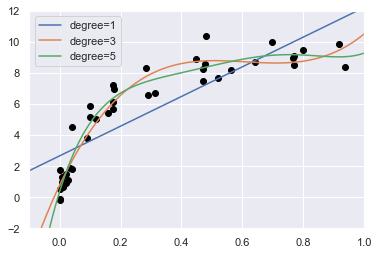

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');


>这个例子中控制模型复杂度的开关就是多项式的阶数，可以是任何非负的整数。这里关键的问题是：哪个阶的多项式在偏差（欠拟合）和方差（过拟合）之间达到了合适的平衡？

我们还可以进一步将这个特殊的数据和模型的验证曲线绘制出来；这可以直接通过Scikit-Learn提供的`validation_curve`工具完成。给定模型、数据、参数名称和一个范围，这个函数能够自动计算范围内所有的训练分数和验证分数：

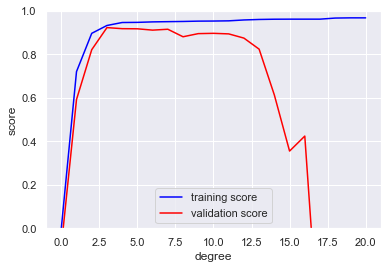

In [33]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', \
                                        param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

上图精确的展示了我们期望的定量行为：训练分数在任何地方都高于验证分数；训练分数是一个单调递增函数，随着模型复杂度增加而增加；然而验证分数在达到最大值后会因为过拟合而开始下降。

从验证曲线中，我们可以看到最优的偏差和方差平衡出现在三阶的多项式附近；我们可以在原始数据上计算并展示这个模型：

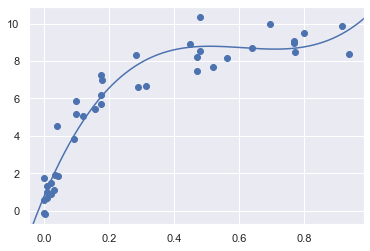

In [34]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);